In [1]:
import pandas as pd
import numpy as np

import matplotlib.pylab as pl

from sklearn.cluster import KMeans

In [2]:
yelp = pd.read_csv('./Data/yelp_counts_per_ct.csv', index_col=0)
yelp.head()

,ct2010,asian,european,halal,hispanic,midmed,Armenian,Cambodian,Caribbean,Chinese,...,Puerto Rican,Russian,Salvadoran,Shanghainese,Singaporean,Taiwanese,Thai,Turkish,Venezuelan,Vietnamese
0,100,7.0,6.0,0.0,4.0,2.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,200,3.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,202,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,300,3.0,4.0,0.0,2.0,2.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,301,0.0,2.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
X = yelp.iloc[:,6:]
X.head()

,Armenian,Cambodian,Caribbean,Chinese,Colombian,Cuban,Dominican,Filipino,French,German,...,Puerto Rican,Russian,Salvadoran,Shanghainese,Singaporean,Taiwanese,Thai,Turkish,Venezuelan,Vietnamese
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# As an alternative, look for an elbow in the within-cluster SSE (k-means example):
SSE = []
for i in range(2,10):
    km = KMeans(n_clusters = i)
    res=km.fit(X)
    SSE.append(res.inertia_)
print(SSE)

[32462.386981311367, 27655.05971430522, 23298.60679338023, 20049.829054798513, 18530.040910905926, 17663.06370138144, 16974.96899192122, 16195.704044231015]


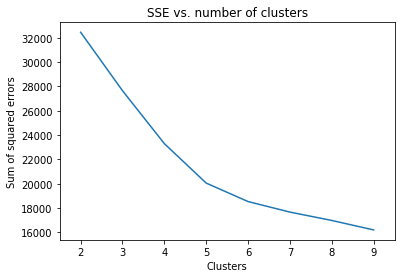

In [5]:
pl.gca()
pl.plot(range(2,10),SSE)
pl.xlabel("Clusters")
pl.ylabel("Sum of squared errors")
pl.title("SSE vs. number of clusters")
pl.xlim(1.5,9.5)
pl.show()

In [6]:
km = KMeans(random_state=234,n_clusters=5)
res=km.fit(X)

In [7]:
res.labels_

array([3, 0, 0, ..., 0, 0, 0], dtype=int32)

In [8]:
yelp['label'] = res.labels_

In [18]:
rs =pd.DataFrame(km.transform(X))
rs = pd.concat((rs,pd.DataFrame(km.fit_predict(X))),axis=1)
rs.columns=list(range(5))+["cluster"]
yelp.loc[:,"score"]=rs.apply(lambda x: x[int(x["cluster"])],axis=1)

In [23]:
yelp.sort_values('score', ascending=False, inplace=True)

,ct2010,asian,european,halal,hispanic,midmed,Armenian,Cambodian,Caribbean,Chinese,...,Salvadoran,Shanghainese,Singaporean,Taiwanese,Thai,Turkish,Venezuelan,Vietnamese,label,score
59,4100,51.0,44.0,1.0,4.0,8.0,0.0,0.0,0.0,19.0,...,0.0,3.0,0.0,3.0,3.0,1.0,0.0,6.0,2,33.318960
54,3800,71.0,17.0,0.0,27.0,8.0,0.0,0.0,0.0,7.0,...,0.0,0.0,0.0,1.0,7.0,0.0,0.0,0.0,2,30.690971
409,28900,51.0,4.0,2.0,9.0,0.0,0.0,0.0,0.0,10.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3,24.326302
855,87100,84.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,43.0,...,0.0,8.0,0.0,10.0,0.0,0.0,0.0,2.0,1,18.475577
90,6500,37.0,39.0,3.0,21.0,6.0,0.0,0.0,3.0,6.0,...,0.0,0.0,0.0,0.0,5.0,1.0,0.0,2.0,2,18.390122


In [26]:
yelp.iloc[0:5].T

,59,54,409,855,90
ct2010,4100.00000,3800.000000,28900.000000,87100.000000,6500.000000
asian,51.00000,71.000000,51.000000,84.000000,37.000000
european,44.00000,17.000000,4.000000,0.000000,39.000000
halal,1.00000,0.000000,2.000000,0.000000,3.000000
hispanic,4.00000,27.000000,9.000000,1.000000,21.000000
midmed,8.00000,8.000000,0.000000,0.000000,6.000000
Armenian,0.00000,0.000000,0.000000,0.000000,0.000000
Cambodian,0.00000,0.000000,0.000000,0.000000,0.000000
Caribbean,0.00000,0.000000,0.000000,0.000000,3.000000
Chinese,19.00000,7.000000,10.000000,43.000000,6.000000


In [9]:
import os
import geopandas as gpd

In [10]:
for file in os.listdir('./Data/2010 Census Tracts'):
    if 'shp' in file:
        ct_2010 = gpd.read_file('./Data/2010 Census Tracts/' + file)

print(ct_2010.crs)
ct_2010.head()

{'init': 'epsg:4326'}


,puma,boro_ct201,ct2010,ntaname,ntacode,boro_name,shape_leng,shape_area,cdeligibil,boro_code,ctlabel,geometry
0,3903,5000900,000900,West New Brighton-New Brighton-St. George,SI22,Staten Island,7729.016794,2.497010e+06,I,5,9,POLYGON ((-74.07920577013245 40.64343078374567...
1,3808,1009800,009800,Turtle Bay-East Midtown,MN19,Manhattan,5534.199811,1.906016e+06,I,1,98,POLYGON ((-73.96432543478758 40.75638153099091...
2,3808,1010000,010000,Turtle Bay-East Midtown,MN19,Manhattan,5692.168737,1.860938e+06,I,1,100,POLYGON ((-73.96802436915851 40.75957814005282...
3,3807,1010200,010200,Midtown-Midtown South,MN17,Manhattan,5687.802439,1.860993e+06,I,1,102,POLYGON ((-73.97124277307127 40.76093641847906...
4,3807,1010400,010400,Midtown-Midtown South,MN17,Manhattan,5693.036367,1.864600e+06,I,1,104,POLYGON ((-73.97445730550224 40.76229308352487...


In [11]:
ct_2010['ct2010'] = pd.to_numeric(ct_2010['ct2010'])

In [12]:
yelp_cluster = ct_2010[['ct2010','geometry']].merge(yelp, on='ct2010')

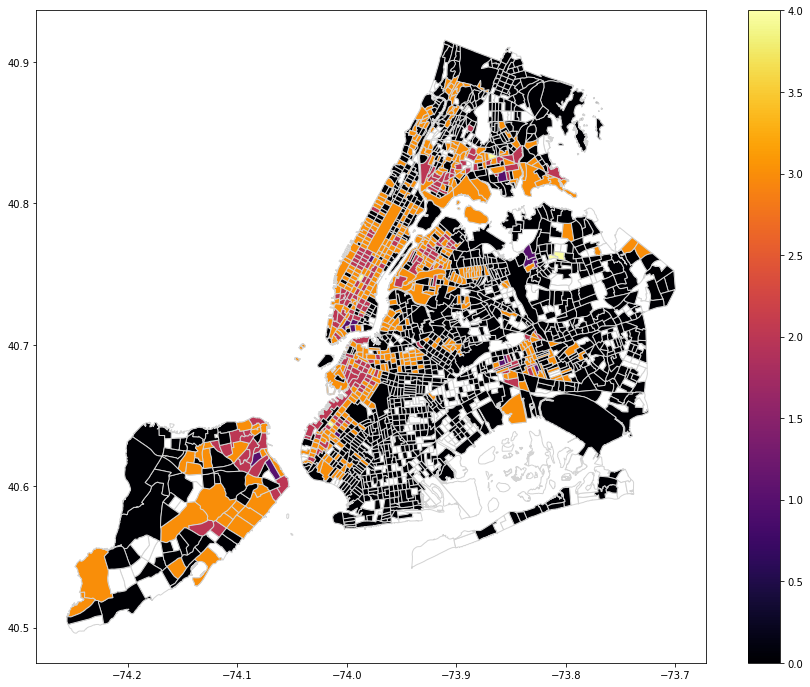

In [36]:
fig = pl.figure(figsize=(15,12))
ax = fig.add_subplot(111)
ct_2010.plot(ax=ax, edgecolor='lightgray', color='white')
yelp_cluster.plot(ax=ax, column='label', cmap='inferno', edgecolor='lightgray', legend=True);

In [21]:
yelp['label'].value_counts()

0    791
3    160
2     46
1      7
4      3
Name: label, dtype: int64

In [39]:
yelp[yelp['label'] == 3].describe().T

,count,mean,std,min,25%,50%,75%,max
ct2010,160.0,21798.95625,23712.099117,100.0,8950.0,15150.0,25525.0,150702.0
asian,160.0,9.30000,6.018629,1.0,5.0,8.0,12.0,51.0
european,160.0,5.89375,3.685083,0.0,3.0,5.0,8.0,16.0
halal,160.0,0.65000,1.041286,0.0,0.0,0.0,1.0,6.0
hispanic,160.0,6.19375,4.192681,0.0,3.0,5.0,9.0,20.0
midmed,160.0,1.86875,2.056197,0.0,0.0,1.0,3.0,9.0
Armenian,160.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0
Cambodian,160.0,0.00625,0.079057,0.0,0.0,0.0,0.0,1.0
Caribbean,160.0,0.40625,0.754832,0.0,0.0,0.0,1.0,4.0
Chinese,160.0,3.31250,2.334288,0.0,2.0,3.0,4.0,15.0


### Further cluster cluster 0

In [22]:
yelp_0 = yelp[yelp['label'] == 0]
yelp_0.head()

,ct2010,asian,european,halal,hispanic,midmed,Armenian,Cambodian,Caribbean,Chinese,...,Russian,Salvadoran,Shanghainese,Singaporean,Taiwanese,Thai,Turkish,Venezuelan,Vietnamese,label
1,200,3.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,202,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,301,0.0,2.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
5,400,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
6,500,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [23]:
X0 = yelp_0.iloc[:,6:-1]
X0.head()

,Armenian,Cambodian,Caribbean,Chinese,Colombian,Cuban,Dominican,Filipino,French,German,...,Puerto Rican,Russian,Salvadoran,Shanghainese,Singaporean,Taiwanese,Thai,Turkish,Venezuelan,Vietnamese
1,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
# As an alternative, look for an elbow in the within-cluster SSE (k-means example):
SSE = []
for i in range(2,10):
    km = KMeans(n_clusters = i)
    res=km.fit(X0)
    SSE.append(res.inertia_)
print(SSE)

[5191.701500672833, 4633.3332065253035, 4298.549866376996, 4087.3054698930687, 3819.694558504506, 3710.740046107628, 3490.2018268306847, 3320.648213818869]


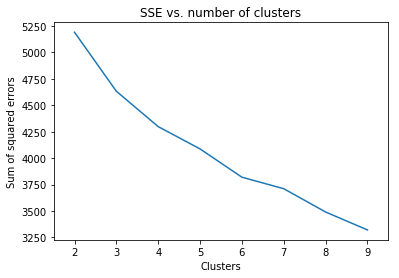

In [25]:
pl.gca()
pl.plot(range(2,10),SSE)
pl.xlabel("Clusters")
pl.ylabel("Sum of squared errors")
pl.title("SSE vs. number of clusters")
pl.xlim(1.5,9.5)
pl.show()

In [26]:
km0 = KMeans(random_state=234,n_clusters=3)
res0=km0.fit(X0)

In [28]:
yelp_0['label_0'] = res0.labels_

/Users/unissechua/devel/PUI2017/venv/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [29]:
yelp0_cluster = ct_2010[['ct2010','geometry']].merge(yelp_0, on='ct2010')

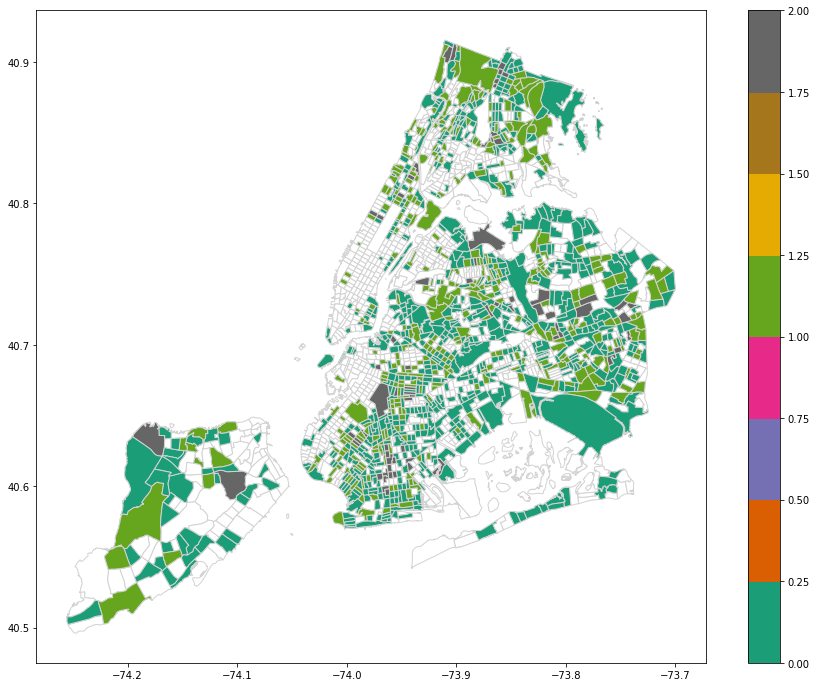

In [32]:
fig = pl.figure(figsize=(15,12))
ax = fig.add_subplot(111)
ct_2010.plot(ax=ax, edgecolor='lightgray', color='white')
yelp0_cluster.plot(ax=ax, column='label_0', cmap='Dark2', edgecolor='lightgray', legend=True);

In [35]:
yelp0_cluster[yelp0_cluster['label_0'] == 0].describe().T

,count,mean,std,min,25%,50%,75%,max
ct2010,744.0,50544.326613,33593.820679,202.0,25500.0,42851.0,67175.0,161700.0
asian,744.0,1.215054,1.296850,0.0,0.0,1.0,2.0,10.0
european,744.0,0.940860,1.203068,0.0,0.0,1.0,1.0,7.0
halal,744.0,0.099462,0.371675,0.0,0.0,0.0,0.0,4.0
hispanic,744.0,1.020161,1.249871,0.0,0.0,1.0,2.0,7.0
midmed,744.0,0.173387,0.621110,0.0,0.0,0.0,0.0,6.0
Armenian,744.0,0.001344,0.036662,0.0,0.0,0.0,0.0,1.0
Cambodian,744.0,0.002688,0.051813,0.0,0.0,0.0,0.0,1.0
Caribbean,744.0,0.295699,0.648994,0.0,0.0,0.0,0.0,7.0
Chinese,744.0,0.532258,0.499294,0.0,0.0,1.0,1.0,1.0
